In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from nansat import *

In [3]:
n2 = Nansat('http://www.ifremer.fr/opendap/cerdap1/globcurrent/global_010_deg/geostrophic/2012/183/20120701000000-GLOBCURRENT-L4-CUR-ALT-geostrophic-v01.0-fv01.0.nc')

WKT: 
x/ySize 3600 1600
(-179.95, 0.099990845, 0, -79.949997, 0, 0.099998474)


In [4]:
n1 = Nansat('/files/normap/20130701000000-METNO-L4_GHRSST-SSTfnd-METNO_OI-ARC-v02.0-fv02.0.nc')
n3 = Nansat('/files/normap/ice_conc_nh_polstere-100_multi_201307011200.nc')

03:10:10|30|mapper_generic|__init__|Use generic mapper - OK!


=>METNO Sea Surface Temperature analysis<=
=>Daily Sea Ice Concentration Analysis from OSI SAF EUMETSAT<=

03:10:10|30|mapper_generic|__init__|Use generic mapper - OK!


In [9]:
print n2

----------------------------------------
http://www.ifremer.fr/opendap/cerdap1/globcurrent/global_010_deg/geostrophic/2012/183/20120701000000-GLOBCURRENT-L4-CUR-ALT-geostrophic-v01.0-fv01.0.nc
----------------------------------------
Mapper: opendap
----------------------------------------
Band : 1 northward_geostrophic_velocity000
  _FillValue: -2147483647.0
  grid_mapping: crs
  name: northward_geostrophic_velocity000
  long_name: Absolute geostrophic velocity: meridian component
  dataType: 7
  units: m/s
  source: GlobCurrent
  SourceFilename: http://www.ifremer.fr/opendap/cerdap1/globcurrent/global_010_deg/geostrophic/2012/183/20120701000000-GLOBCURRENT-L4-CUR-ALT-geostrophic-v01.0-fv01.0.nc?northward_geostrophic_velocity.northward_geostrophic_velocity[0][y][x]
  time: 22827.0
  SourceBand: 1
Band : 2 eastward_geostrophic_velocity000
  _FillValue: -2147483647.0
  grid_mapping: crs
  name: eastward_geostrophic_velocity000
  long_name: Absolute geostrophic velocity: zonal component


In [10]:
d = Domain(4326, '-te -12 60 20 81 -tr 0.05 0.05')

n1.reproject(d)
n2.reproject(d)
n3.reproject(d)

u = n2['eastward_geostrophic_velocity000']
v = n2['northward_geostrophic_velocity000']
lons, lats = n2.get_geolocation_grids()

sst = n1['analysed_sst']
ice_conc = n3['ice_conc']



NameError: name 'watermask' is not defined

-c:9: RuntimeWarning: invalid value encountered in less
-c:10: RuntimeWarning: invalid value encountered in less
-c:13: RuntimeWarning: invalid value encountered in less_equal
-c:16: RuntimeWarning: invalid value encountered in greater
-c:17: RuntimeWarning: invalid value encountered in greater
-c:20: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python2.7/dist-packages/numpy-1.8.0-py2.7-linux-x86_64.egg/numpy/ma/core.py:778: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


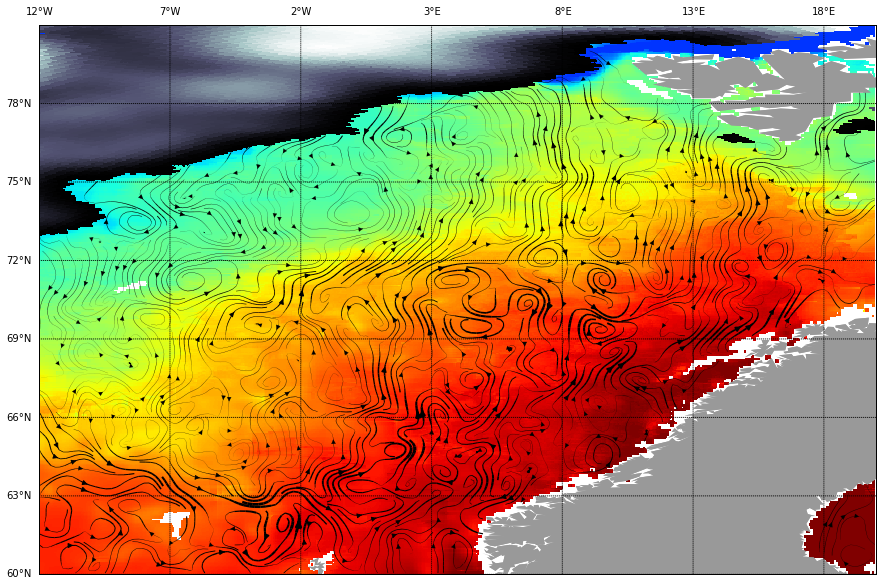

In [11]:
# mask land
watermask = n1.watermask('/files/MOD44W/')[1]
sst[watermask == 2] = np.nan
u[watermask == 2] = np.nan
v[watermask == 2] = np.nan
ice_conc[watermask == 2] = np.nan

# mask invalid U and V
u[u<-10] = np.nan
v[v<-10] = np.nan

# mask zero ice concentration
ice_conc[ice_conc <= 0] = np.nan

# mask under-ice currents
u[ice_conc > 0] = np.nan
v[ice_conc > 0] = np.nan

# mask invalid SST
sst[sst < 0] = np.nan

nmap = Nansatmap(n3, resolution='l')
nmap.pcolormesh(sst-273.15, vmin=-5, vmax=13)
nmap.pcolormesh(ice_conc, cmap='bone')

nmap.streamplot(lons, lats, u, v, density=5, linewidth=np.hypot(u,v)*10, color='k')

nmap.draw_continents()
nmap.drawmeridians(np.arange(-12, 20, 5), labels=[False,False,True,False])
nmap.drawparallels(np.arange(60, 81, 3), labels=[True, False, False, False])

# set size of the figure (inches)
nmap.fig.set_figheight(20)
nmap.fig.set_figwidth(15)

# save figure to a PNG file
nmap.save('normap_globcurrent_map.png')